In [1]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import torchviz
from collections import OrderedDict

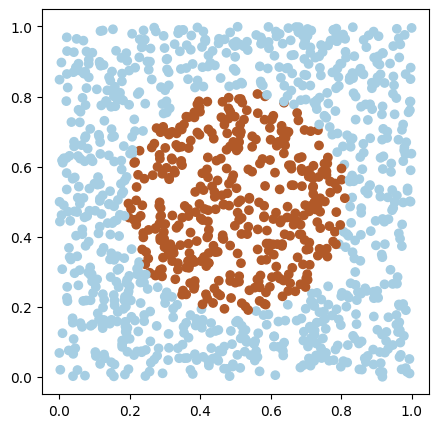

In [2]:
class TwoLayersNet(nn.Module):
    def __init__(self, nX, nH, nY):        
        super(TwoLayersNet, self).__init__()     # конструктор         
        self.fc1 = nn.Linear(nX, nH)             # створення параметрів моделі
        self.fc2 = nn.Linear(nH, nY)             # у повнозв'язкових шарах
          
    def forward(self, x):                        # задаємо прямий прохід
        x = self.fc1(x)                          # вихід першого шару
        x = nn.Sigmoid()(x)                      # сигмоїдна активація
        x = self.fc2(x)                          # вихід другого шару
        x = nn.Sigmoid()(x)                      # сигмоїдна активація
        return x

medel = TwoLayersNet(2, 5, 1)

X = torch.rand (1200, 2)
Y = (torch.sum((X - 0.5)**2, axis=1) < 0.1).float().view(-1,1)

plt.figure (figsize=(5, 5))
plt.scatter(X.numpy()[:,0], X.numpy()[:,1], c=Y.numpy()[:,0],cmap=plt.cm.Paired)        
plt.show() 

In [12]:
model = TwoLayersNet(2, 5, 1)                                  
 
loss = nn.MSELoss()
optimizer = torch.optim.Adam(params=model.parameters(), lr=0.04)
def fit(model, X,Y, batch_size=100, train=True):    
      model.train(train)                                 
      sumL, sumA, numB = 0, 0, int( len(X)/batch_size ) 
       
      for i in range(0, numB*batch_size, batch_size):          
        xb = X[i: i+batch_size]                          # поточний батч
        yb = Y[i: i+batch_size]                          # тензори поточного батчу
                      
        y = model(xb)                                    # пряме розповсюдження
        L = loss(y, yb)                                  # похибка
  
        if train:                                        # в режимі навчання
            optimizer.zero_grad()                        # обнуляємо градієнти,        
            L.backward()                                 # обчислюємо градієнти,            
            optimizer.step()                             # підганяємо параметри
                                     
        sumL += L.item()                                 # сумарна похибка
        sumA += (y.round() == yb).float().mean()         # точність визначення окремого класу
         
        return sumL/numB,  sumA/numB   
                                                         # режим оцінки моделі
print( "before:      loss: %.4f accuracy: %.4f" %  fit(model, X,Y) )
 
epochs = 10000                                            # число епох
for epoch in range(epochs):                              # епоха: прохід
    L,A = fit(model, X, Y)                               # по всьому датасету
     
    if epoch % 100 == 0 or epoch == epochs-1:                 
        print(f'epoch: {epoch:5d} loss: {L:.4f} accuracy: {A:.4f}' ) 

before:      loss: 0.0217 accuracy: 0.0308
epoch:     0 loss: 0.0207 accuracy: 0.0375
epoch:   100 loss: 0.0192 accuracy: 0.0525
epoch:   200 loss: 0.0153 accuracy: 0.0575
epoch:   300 loss: 0.0042 accuracy: 0.0825
epoch:   400 loss: 0.0024 accuracy: 0.0833
epoch:   500 loss: 0.0017 accuracy: 0.0833
epoch:   600 loss: 0.0013 accuracy: 0.0833
epoch:   700 loss: 0.0010 accuracy: 0.0833
epoch:   800 loss: 0.0009 accuracy: 0.0833
epoch:   900 loss: 0.0007 accuracy: 0.0833
epoch:  1000 loss: 0.0006 accuracy: 0.0833
epoch:  1100 loss: 0.0005 accuracy: 0.0833
epoch:  1200 loss: 0.0004 accuracy: 0.0833
epoch:  1300 loss: 0.0004 accuracy: 0.0833
epoch:  1400 loss: 0.0003 accuracy: 0.0833
epoch:  1500 loss: 0.0003 accuracy: 0.0833
epoch:  1600 loss: 0.0002 accuracy: 0.0833
epoch:  1700 loss: 0.0002 accuracy: 0.0833
epoch:  1800 loss: 0.0002 accuracy: 0.0833
epoch:  1900 loss: 0.0002 accuracy: 0.0833
epoch:  2000 loss: 0.0001 accuracy: 0.0833
epoch:  2100 loss: 0.0001 accuracy: 0.0833
epoch:  220

In [13]:
print(model)

TwoLayersNet(
  (fc1): Linear(in_features=2, out_features=5, bias=True)
  (fc2): Linear(in_features=5, out_features=1, bias=True)
)


In [14]:
dict(model.named_parameters())

{'fc1.weight': Parameter containing:
 tensor([[-35.4931,  27.9343],
         [-45.7412, -22.7556],
         [-20.4891, -22.1124],
         [ 27.6073,  13.1393],
         [  0.8349, -26.5544]], requires_grad=True),
 'fc1.bias': Parameter containing:
 tensor([ -7.9652,  20.1833,  29.6548, -21.8758,   5.7344], requires_grad=True),
 'fc2.weight': Parameter containing:
 tensor([[-32.4960, -26.2257,  25.7873, -13.3792, -32.8317]],
        requires_grad=True),
 'fc2.bias': Parameter containing:
 tensor([0.0117], requires_grad=True)}

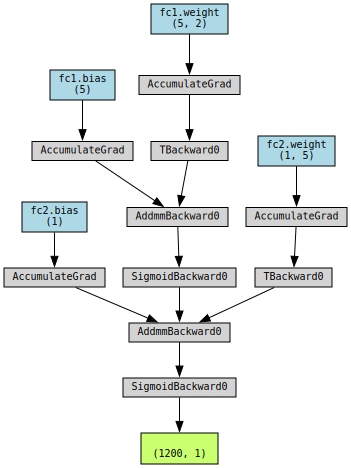

In [15]:
torchviz.make_dot(model(X), params = dict(model.named_parameters()))